# iPython Cookbook - Linking to Excel (and Curve Fitting)
## Get the Excel file from Dropbox

An easy way to get a file on to a remote server is to put it onto Dropbox and to pick it up from there. Admittedly this is not entirely secure (everyone with the URL can pick up the file) but generally this should be acceptable: the connection to Dropbox is https so noone should be able to listen in and identify the filename (and if they can listen in then there are bigger issues anyway)

First we are setting two paramters: `url` which is the full Dropbox URL of the file in question, and `force`. If the latter parameter is set to $0$ then the file is only downloaded once per kernel-reset, which allows to experiment with the analysis on the data without having to wait for the download every time. Once the analysis is frozen one might want to set `force` back to 1, which always pulls the latest copy of the Excel sheet from the server.

In [1]:
force = 1
url = 'https://www.dropbox.com/s/js5xibpv6z18mej/20140709-iPython-Data.xlsx'
url = 'https://rawgit.com/oditorium/blog/master/iPython/20140709-iPython-Data.xlsx'

This code downloads the file. Most of it is bookkeeping stuff actually, to ensure that files are not downloaded twice and (importantly!) that the file is overwritten rather than ending up as `.1`. The key command here is `!wget $url`.

In [2]:
from urllib.parse import urlparse
from os.path import basename

bn = basename(urlparse(url).path)
try:
    already_downloaded
except:
    already_downloaded = False
    
if force or not already_downloaded:
    already_downloaded = True
    !rm $bn
    !wget $url
#!ls -l

--2014-08-12 22:11:39--  https://rawgit.com/oditorium/blog/master/iPython/20140709-iPython-Data.xlsx
Resolving rawgit.com (rawgit.com)... 192.241.224.252
Connecting to rawgit.com (rawgit.com)|192.241.224.252|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://raw.githubusercontent.com/oditorium/blog/master/iPython/20140709-iPython-Data.xlsx [following]
--2014-08-12 22:11:40--  https://raw.githubusercontent.com/oditorium/blog/master/iPython/20140709-iPython-Data.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.31.18.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.31.18.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47629 (47K) [application/octet-stream]
Saving to: ‘20140709-iPython-Data.xlsx’

100%[======================================>] 47,629      --.-K/s   in 0.003s  

2014-08-12 22:11:40 (17.9 MB/s) - ‘20140709-iPython-Data.xlsx’ saved [47629/47629]



## Import Data from Excel
We now import the data from Excel, using `pandas`. The command is `read_excel()`. The parameter `Sheet1` indicates the sheet name, `header=0` indicates that the row 0 contains the header information, and the parameter `parse_cols=1` indicates that only 2 columns should be parsed (only necessary if the sheet contains other data).

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_excel(bn, 'Sheet1', header=0, parse_cols=1)
data.head()

,x,y
0,0.120357,3.976362
1,0.523168,2.928447
2,0.433736,3.253486
3,0.270884,3.405502
4,0.270422,3.414178


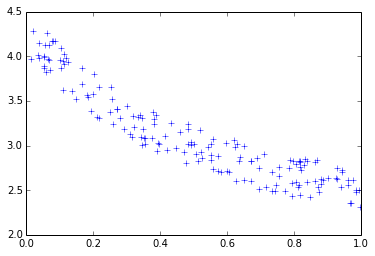

In [4]:
plt.plot(data['x'], data['y'], '+')

## Fit the Curve
Now we run the curve fit. The code is identical to the one in the CurveFitting notebook.

a=1.91812508898, b=2.28743008516, c=2.35496084448


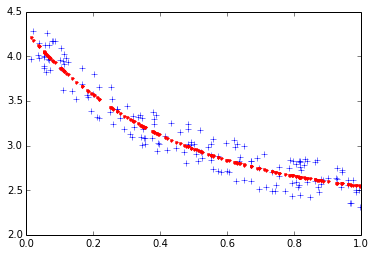

In [5]:
from scipy.optimize import curve_fit 

# choose the function to be fitted... 
def func (x,a,b,c):
    return a*exp(-b*x)+c

# ...and provide initial estimates for the parameters
a0,b0,c0 = (0.5,0.5,0.5)

# exectute the curve fit...
coeffs, fiterr = curve_fit(func, data['x'], data['y'], p0=(a0,b0,c0))

# ...and plot the results
print ("a=%s, b=%s, c=%s" % (coeffs[0], coeffs[1], coeffs[2]))
plt.plot(data['x'], data['y'], '+')
plt.plot(data['x'],func(data['x'],*coeffs),'r.')
plt.show()

a=0.5, b=0.5, c=0.5


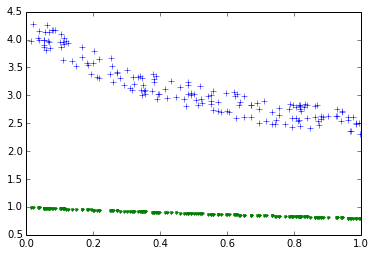

In [6]:
# manually fit the curve to obtain a viable set of starting parameters
at,bt,ct = (0.5,0.5,0.5)
plt.plot(data['x'],data['y'], '+')
plot(data['x'],func(data['x'],at,bt,ct), 'g.')
print ("a=%s, b=%s, c=%s" % (at,bt,ct))

## Licence and version
*(c) Stefan Loesch / oditorium 2014; all rights reserved 
([license](https://github.com/oditorium/blog/blob/master/LICENSE))*

In [7]:
import sys
print(sys.version)

3.4.0 (default, Apr 11 2014, 13:05:11) 
[GCC 4.8.2]
